<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n250.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,0.229894,175.888703,175.607081,0.281622
1,0.0,1.0,86.165717,56.959442,56.713429,0.127112,209.965701,209.884624,0.081077
2,0.0,2.0,82.871910,67.183861,68.394119,0.565518,229.015408,228.473546,0.541862
3,0.0,3.0,60.173628,73.828076,88.180822,0.132543,232.315068,232.140218,0.174850
4,0.0,4.0,35.709130,85.695082,80.454669,-0.691625,211.167256,211.829320,-0.662064
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,0.263975,262.947163,262.716551,0.230612
59996,999.0,56.0,36.953943,85.309647,24.003992,-0.142207,156.125375,156.307062,-0.181688
59997,999.0,57.0,64.419649,76.774011,25.100978,0.095696,176.390333,176.276998,0.113335
59998,999.0,58.0,90.553946,37.505438,62.282147,0.039648,200.381178,200.395890,-0.014712


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,0.229894,175.888703,175.607081,0.281622
1,0.0,1.0,86.165717,56.959442,56.713429,0.127112,209.965701,209.884624,0.081077
2,0.0,2.0,82.871910,67.183861,68.394119,0.565518,229.015408,228.473546,0.541862
3,0.0,3.0,60.173628,73.828076,88.180822,0.132543,232.315068,232.140218,0.174850
4,0.0,4.0,35.709130,85.695082,80.454669,-0.691625,211.167256,211.829320,-0.662064
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,0.263975,262.947163,262.716551,0.230612
59996,999.0,56.0,36.953943,85.309647,24.003992,-0.142207,156.125375,156.307062,-0.181688
59997,999.0,57.0,64.419649,76.774011,25.100978,0.095696,176.390333,176.276998,0.113335
59998,999.0,58.0,90.553946,37.505438,62.282147,0.039648,200.381178,200.395890,-0.014712


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    51.042187  40.567865  74.048756  ...  175.888703  175.607081  0.281622
      1.0    86.165717  56.959442  56.713429  ...  209.965701  209.884624  0.081077
      2.0    82.871910  67.183861  68.394119  ...  229.015408  228.473546  0.541862
      3.0    60.173628  73.828076  88.180822  ...  232.315068  232.140218  0.174850
      4.0    35.709130  85.695082  80.454669  ...  211.167256  211.829320 -0.662064
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   81.638297  88.645565  82.399326  ...  262.947163  262.716551  0.230612
      56.0   36.953943  85.309647  24.003992  ...  156.125375  156.307062 -0.181688
      57.0   64.419649  76.774011  25.100978  ...  176.390333  176.276998  0.113335
      58.0   90.553946  37.505438  62.282147  ...  200.381178  200.395890 -0.014712
      59.0   20.879664  91.183392  42.595062  ...  164.797065  164.768891  0.028174

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    51.042187  40.567865  74.048756  ...  175.888703  175.607081  0.281622
      1.0    86.165717  56.959442  56.713429  ...  209.965701  209.884624  0.081077
      2.0    82.871910  67.183861  68.394119  ...  229.015408  228.473546  0.541862
      3.0    60.173628  73.828076  88.180822  ...  232.315068  232.140218  0.174850
      4.0    35.709130  85.695082  80.454669  ...  211.167256  211.829320 -0.662064
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   81.638297  88.645565  82.399326  ...  262.947163  262.716551  0.230612
      56.0   36.953943  85.309647  24.003992  ...  156.125375  156.307062 -0.181688
      57.0   64.419649  76.774011  25.100978  ...  176.390333  176.276998  0.113335
      58.0   90.553946  37.505438  62.282147  ...  200.381178  200.395890 -0.014712
      59.0   20.879664  91.183392  42.595062  ...  164.797065  164.768891  0.028174

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,0.229894,175.888703,175.607081,0.281622
1,0.0,1.0,86.165717,56.959442,56.713429,0.127112,209.965701,209.884624,0.081077
2,0.0,2.0,82.871910,67.183861,68.394119,0.565518,229.015408,228.473546,0.541862
3,0.0,3.0,60.173628,73.828076,88.180822,0.132543,232.315068,232.140218,0.174850
4,0.0,4.0,35.709130,85.695082,80.454669,-0.691625,211.167256,211.829320,-0.662064
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,0.263975,262.947163,262.716551,0.230612
59996,999.0,56.0,36.953943,85.309647,24.003992,-0.142207,156.125375,156.307062,-0.181688
59997,999.0,57.0,64.419649,76.774011,25.100978,0.095696,176.390333,176.276998,0.113335
59998,999.0,58.0,90.553946,37.505438,62.282147,0.039648,200.381178,200.395890,-0.014712


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    51.042187  40.567865  74.048756  ...  175.888703  175.607081  0.281622
      1.0    86.165717  56.959442  56.713429  ...  209.965701  209.884624  0.081077
      2.0    82.871910  67.183861  68.394119  ...  229.015408  228.473546  0.541862
      3.0    60.173628  73.828076  88.180822  ...  232.315068  232.140218  0.174850
      4.0    35.709130  85.695082  80.454669  ...  211.167256  211.829320 -0.662064
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   81.638297  88.645565  82.399326  ...  262.947163  262.716551  0.230612
      56.0   36.953943  85.309647  24.003992  ...  156.125375  156.307062 -0.181688
      57.0   64.419649  76.774011  25.100978  ...  176.390333  176.276998  0.113335
      58.0   90.553946  37.505438  62.282147  ...  200.381178  200.395890 -0.014712
      59.0   20.879664  91.183392  42.595062  ...  164.797065  164.768891  0.028174

[60000 rows x 7 columns]

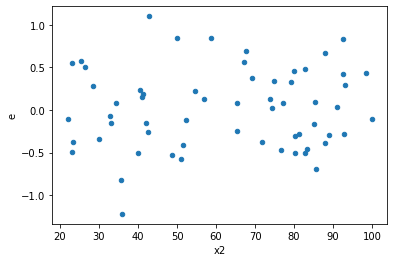

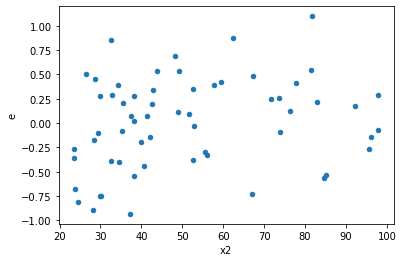

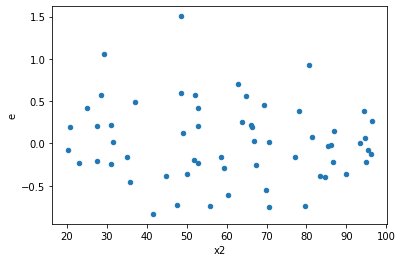

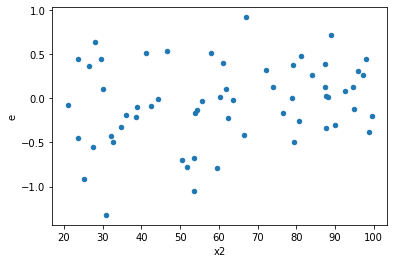

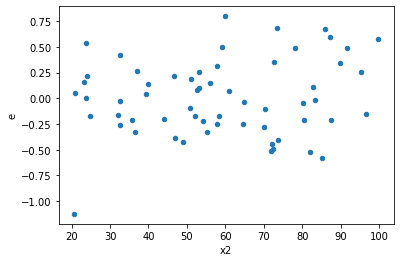

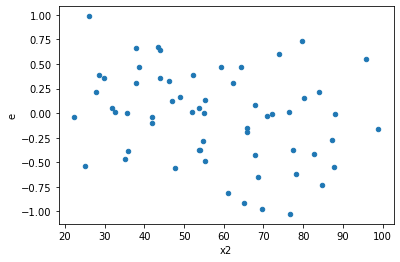

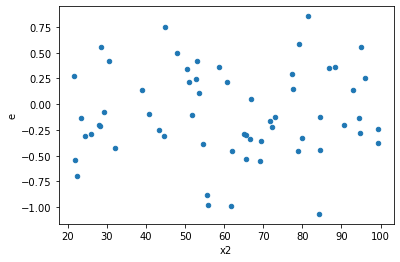

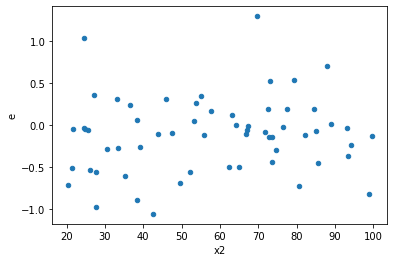

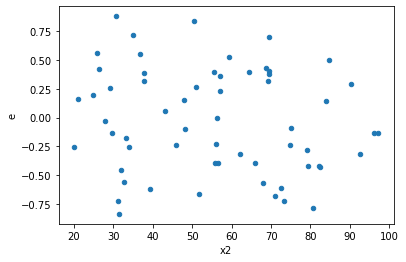

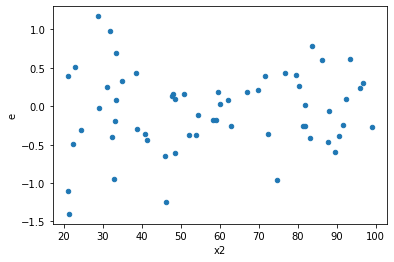

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,21.0,21.0,2.4210125056445,3.3497886295081702,0.11528630979259524,0.1595137442622938,1.3836312789373302,0.463180391970734,0.768409804014633,0.231590195985367,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,3.058500232940751,3.4395999826823354,0.14564286823527386,0.1637904753658255,1.124603472524557,0.7903865459712771,0.6048067270143614,0.39519327298563856,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,2.4406400899463385,3.610940398076432,0.11622095666411136,0.1719495427655444,1.47950548421739,0.3766306017343255,0.8116846991328373,0.18831530086716275,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,3.364696463430256,3.9179515780575676,0.16022364111572646,0.18656912276464607,1.1644294279262495,0.730458972080863,0.6347705139595685,0.3652294860404315,Reject001=1 : Homoscedasticity
13.0,21.0,21.0,2.371148844384019,3.324753216475305,0.11291184973257233,0.1583215817369193,1.402169764394953,0.4451337992347484,0.7774331003826258,0.2225668996173742,Reject001=1 : Homoscedasticity
31.0,21.0,21.0,2.0377251538808205,5.04159155616278,0.09703453113718193,0.24007578838870383,2.47412736038574,0.04359470395160159,0.9782026480241992,0.021797351975800794,Reject001=1 : Homoscedasticity
37.0,21.0,21.0,3.6186818793598285,4.16835403649695,0.1723181847314204,0.19849304935699763,1.1518984468550086,0.7489307243163299,0.625534637841835,0.37446536215816495,Reject001=1 : Homoscedasticity
38.0,21.0,21.0,3.1234933878477698,3.851506293025155,0.14873778037370333,0.18340506157262643,1.2330764995404775,0.6355380362516767,0.6822309818741616,0.31776901812583835,Reject001=1 : Homoscedasticity
47.0,21.0,21.0,3.027383449262892,3.3358575650083067,0.1441611166315663,0.1588503602384908,1.1018946297736159,0.8261409848623973,0.5869295075688014,0.41307049243119864,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,6.270209280932153,3.966691140955724,0.2985813943301025,0.18889005433122494,0.6326249991397449,0.3019329819929235,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,5.498440457849435,4.330706665299667,0.26183049799283026,0.20622412691903177,0.787624545268515,0.5892626610341437,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,6.442648924909198,3.3100261916302784,0.3067928059480571,0.15762029483953707,0.5137678973679183,0.1350508730268449,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,6.230785059552722,1.951926300634587,0.2967040504548915,0.09294887145878986,0.3132713264826867,0.01046147950797045,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,2.4210125056445,3.3497886295081702,0.11528630979259524,0.1595137442622938,1.3836312789373302,0.463180391970734,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,3.058500232940751,3.4395999826823354,0.14564286823527386,0.1637904753658255,1.124603472524557,0.7903865459712771,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,2.4406400899463385,3.610940398076432,0.11622095666411136,0.1719495427655444,1.47950548421739,0.3766306017343255,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,5.523021064195415,3.689204371247486,0.26300100305692453,0.17567639863083265,0.6679685498872749,0.36250827397674235,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,3.364696463430256,3.9179515780575676,0.16022364111572646,0.18656912276464607,1.1644294279262495,0.730458972080863,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      959
Reject001=0 : Heteroscedasticity     41
Name: Result_test, dtype: int64